# 1. 포켓몬 149종 분류
* Train: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
* Validation: https://www.kaggle.com/hlrhegemony/pokemon-image-dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
import os

In [4]:
os.environ['KAGGLE_USERNAME'] = 'jeongwonryu' # username
os.environ['KAGGLE_KEY'] = '9b8af92a63e791a9996eb823cc9b44c6' # key

In [5]:
!kaggle datasets download -d thedagger/pokemon-generation-one
!unzip -q pokemon-generation-one.zip

100% 2.15G/2.15G [01:41<00:00, 23.7MB/s]
100% 2.15G/2.15G [01:41<00:00, 22.7MB/s]


In [6]:
!kaggle datasets download -d hlrhegemony/pokemon-image-dataset
!unzip -q pokemon-image-dataset.zip

 97% 56.0M/57.9M [00:04<00:00, 21.0MB/s]
100% 57.9M/57.9M [00:04<00:00, 14.7MB/s]


In [7]:
# 디렉토리 이름 변경
!mv dataset train

In [8]:
!mv images validation

In [9]:
# 중복된 dataset 디렉토리 삭제
!rm -rf train/dataset

In [10]:
import os

In [11]:
train_labels = os.listdir('train')
len(train_labels)

149

In [12]:
val_labels = os.listdir('validation')
len(val_labels)

898

In [13]:
import shutil

In [14]:
for val_label in val_labels:
    if val_label not in train_labels:
        shutil.rmtree(os.path.join('validation', val_label))

val_labels = os.listdir('validation')
len(val_labels)

147

In [15]:
for train_label in train_labels:
    if train_label not in val_labels:
        print(train_label)
        os.makedirs(os.path.join('validation', train_label), exist_ok=True)

val_labels = os.listdir('validation')
print(len(val_labels))

MrMime
Farfetchd
149


In [17]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'validation': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
}

image_datasets = {
    'train': datasets.ImageFolder('train', data_transforms['train']),
    'validation': datasets.ImageFolder('validation', data_transforms['validation'])
}

dataloaders = {
    'train': DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation': DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

print(len(image_datasets['train']), len(image_datasets['validation']))

10657 661


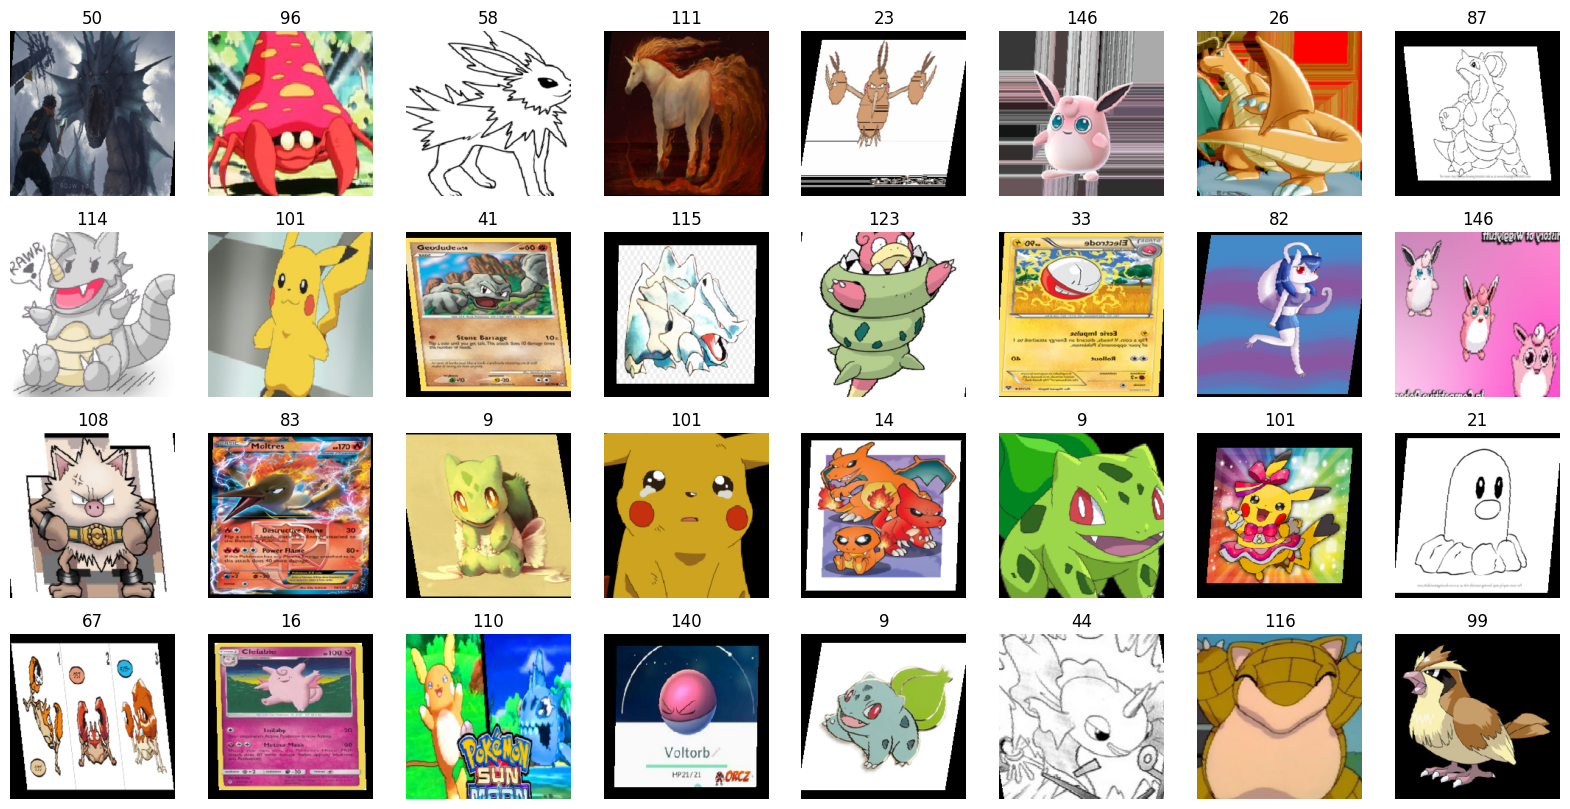

In [18]:
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for img, label, ax in zip(imgs, labels, axes.flatten()):
    ax.set_title(label.item())
    ax.imshow(img.permute(1, 2, 0))
    ax.axis('off')

In [19]:
# 클래스 이름 확인하기
print(image_datasets['train'].classes)
print(image_datasets['train'].classes[0])

['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidorina'

In [20]:
# 사전 학습된 EfficientNet B4 모델 사용하기
model = models.efficientnet_b4(weights='IMAGENET1K_V1').to(device)
print(model)

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-7eb33cd5.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-7eb33cd5.pth
100%|██████████| 74.5M/74.5M [00:02<00:00, 26.2MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [21]:
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149)
).to(device)

print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [22]:
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 10

for epoch in range(epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        sum_losses = 0
        sum_accs = 0

        for x_batch, y_batch in dataloaders[phase]:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            y_pred = model(x_batch)

            loss = nn.CrossEntropyLoss()(y_pred, y_batch)

            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            sum_losses = sum_losses + loss.item()

            y_prob = nn.Softmax(1)(y_pred)
            y_pred_index = torch.argmax(y_prob, axis=1)
            acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100

            sum_accs = sum_accs + acc.item()

        avg_loss = sum_losses / len(dataloaders[phase])
        avg_acc = sum_accs / len(dataloaders[phase])

        print(f'{phase:10s}: Eposh {epoch+1:4d}/{epochs}, Loss:{avg_loss:.4f}, Accuracy:{avg_acc:.2f}%')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train     : Eposh    1/10, Loss:3.3545, Accuracy:29.58%
validation: Eposh    1/10, Loss:1.4965, Accuracy:68.57%
train     : Eposh    2/10, Loss:1.7792, Accuracy:57.71%
validation: Eposh    2/10, Loss:0.9629, Accuracy:78.03%
train     : Eposh    3/10, Loss:1.4785, Accuracy:64.03%
validation: Eposh    3/10, Loss:0.7940, Accuracy:80.41%
train     : Eposh    4/10, Loss:1.3630, Accuracy:66.70%
validation: Eposh    4/10, Loss:0.6990, Accuracy:83.55%
train     : Eposh    5/10, Loss:1.1348, Accuracy:71.18%
validation: Eposh    5/10, Loss:0.6182, Accuracy:86.52%
train     : Eposh    6/10, Loss:1.0444, Accuracy:72.52%
validation: Eposh    6/10, Loss:0.5664, Accuracy:84.89%
train     : Eposh    7/10, Loss:1.0422, Accuracy:73.92%
validation: Eposh    7/10, Loss:0.6705, Accuracy:83.09%
train     : Eposh    8/10, Loss:0.9947, Accuracy:74.31%
validation: Eposh    8/10, Loss:0.5622, Accuracy:86.66%
train     : Eposh    9/10, Loss:0.8675, Accuracy:76.65%
validation: Eposh    9/10, Loss:0.5636, Accuracy

In [23]:
torch.save(model.state_dict(), 'model.h5')

In [24]:
model = models.efficientnet_b4().to(device)

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149)
).to(device)

model.load_state_dict(torch.load('model.h5'))
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

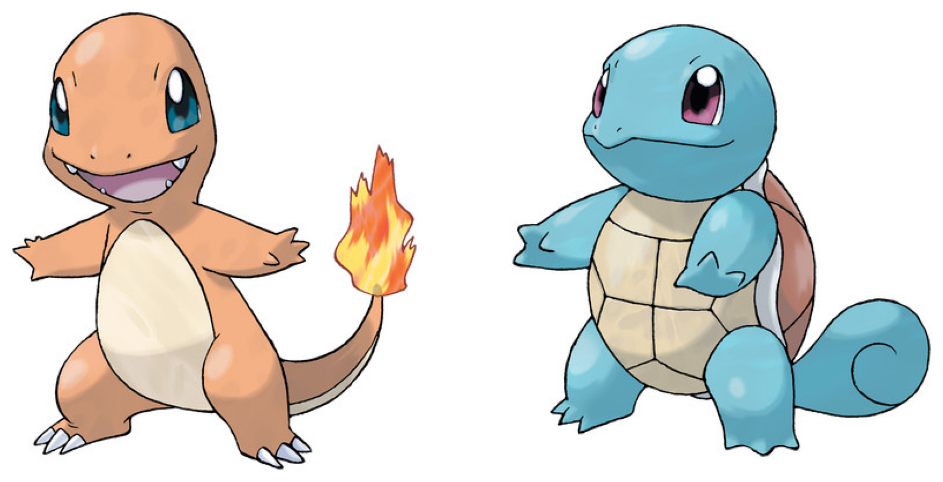

In [25]:
# 테스트
from PIL import Image

img1 = Image.open('validation/Charmander/0.jpg')
img2 = Image.open('validation/Squirtle/0.jpg')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()

In [26]:
img1_input = data_transforms['validation'](img1)
img2_input = data_transforms['validation'](img2)
print(img1_input.shape)
print(img2_input.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [27]:
test_batch = torch.stack([img1_input, img2_input])
test_batch = test_batch.to(device)
test_batch.shape

torch.Size([2, 3, 224, 224])

In [28]:
y_pred = model(test_batch)
y_pred

tensor([[-10.6324, -23.0976, -16.1726, -15.7229, -11.0389, -14.2876, -18.8919,
          -8.4703, -12.0619,  -8.0851, -20.0893, -18.3568, -10.3235,  -7.8833,
           6.5985,  -4.4216, -19.3750, -17.0246, -24.8557,  -9.6452,  -7.0566,
          -5.5009, -20.5991, -16.9601, -16.0181, -12.2985,  -7.8794, -12.8139,
         -11.7701,  -5.7952, -13.2401, -11.6902, -18.0423, -12.0920, -15.6632,
         -13.2647, -13.1675, -14.3555, -15.7334, -13.5286, -13.6216, -11.2197,
         -13.6319, -18.7428, -11.9348,  -8.0302, -12.5841, -17.1822, -13.4088,
         -11.3799, -19.6532, -18.4034,  -7.5758, -10.6376, -10.2988, -13.0607,
         -16.9939, -17.1142, -18.4312,  -9.8360,  -4.5998, -11.8492, -13.8150,
         -15.1390,  -9.8224, -13.5010, -15.3736, -11.4482, -10.7818, -11.5418,
         -17.0843, -13.6517,  -4.7517, -13.6281, -11.7598, -14.3710, -15.2209,
          -9.1997,  -9.6199, -13.4015, -18.6520,  -8.3224, -11.5488, -17.5674,
         -17.3184, -15.8016, -17.0488, -12.5530, -12

In [29]:
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[3.2855e-08, 1.2677e-13, 1.2898e-10, 2.0221e-10, 2.1879e-08, 8.4950e-10,
         8.5025e-12, 2.8547e-07, 7.8659e-09, 4.1963e-07, 2.5675e-12, 1.4519e-11,
         4.4744e-08, 5.1345e-07, 9.9967e-01, 1.6364e-05, 5.2449e-12, 5.5017e-11,
         2.1851e-14, 8.8174e-08, 1.1737e-06, 5.5612e-06, 1.5421e-12, 5.8683e-11,
         1.5052e-10, 6.2089e-09, 5.1548e-07, 3.7082e-09, 1.0532e-08, 4.1434e-06,
         2.4215e-09, 1.1407e-08, 1.9883e-11, 7.6331e-09, 2.1466e-10, 2.3627e-09,
         2.6037e-09, 7.9373e-10, 2.0011e-10, 1.8147e-09, 1.6534e-09, 1.8261e-08,
         1.6366e-09, 9.8694e-12, 8.9327e-09, 4.4332e-07, 4.6666e-09, 4.6996e-11,
         2.0455e-09, 1.5558e-08, 3.9709e-12, 1.3858e-11, 6.9833e-07, 3.2685e-08,
         4.5865e-08, 2.8972e-09, 5.6729e-11, 5.0301e-11, 1.3477e-11, 7.2854e-08,
         1.3694e-05, 9.7309e-09, 1.3627e-09, 3.6259e-10, 7.3852e-08, 1.8654e-09,
         2.8674e-10, 1.4531e-08, 2.8296e-08, 1.3232e-08, 5.1828e-11, 1.6044e-09,
         1.1763e-05, 1.6427e

In [30]:
probs, indices = torch.topk(y_prob, k=3, axis=-1)

probs = probs.cpu().data.numpy()
indices = indices.cpu().data.numpy()

print(probs)
print(indices)

[[9.9966812e-01 2.7358282e-04 1.6364076e-05]
 [9.9713159e-01 2.7940774e-03 4.7019475e-05]]
[[ 14 127  15]
 [127  14 142]]


In [31]:
9.9966812e-01

0.99966812

In [32]:
9.9713159e-01

0.99713159

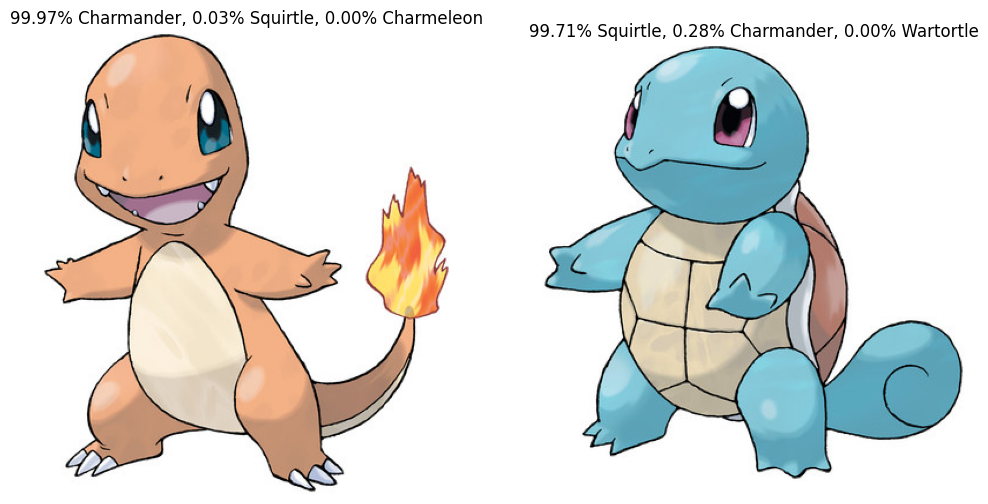

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100, image_datasets['validation'].classes[indices[0, 0]],
    probs[0, 1] * 100, image_datasets['validation'].classes[indices[0, 1]],
    probs[0, 2] * 100, image_datasets['validation'].classes[indices[0, 2]]
))
axes[0].imshow(img1)
axes[0].axis('off')

axes[1].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[1, 0] * 100, image_datasets['validation'].classes[indices[1, 0]],
    probs[1, 1] * 100, image_datasets['validation'].classes[indices[1, 1]],
    probs[1, 2] * 100, image_datasets['validation'].classes[indices[1, 2]]
))
axes[1].imshow(img2)
axes[1].axis('off')

plt.show()